## Linear Regression

### The Normal Equation

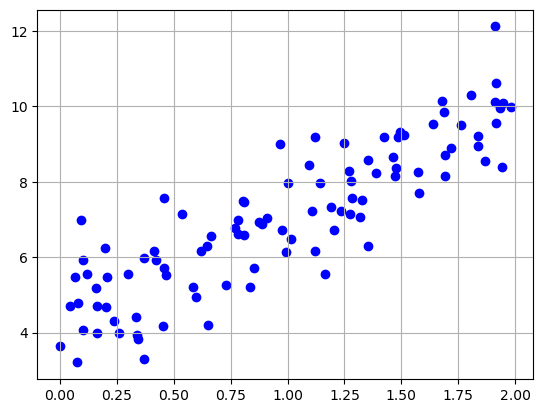

array([[4.26267339],
       [2.85180921]])

In [38]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

plt.scatter(X, y, color="blue", marker="o")
plt.grid(True)
plt.show()
theta_best

[[4.26267339]
 [9.96629181]]
[[1. 0.]
 [1. 2.]]


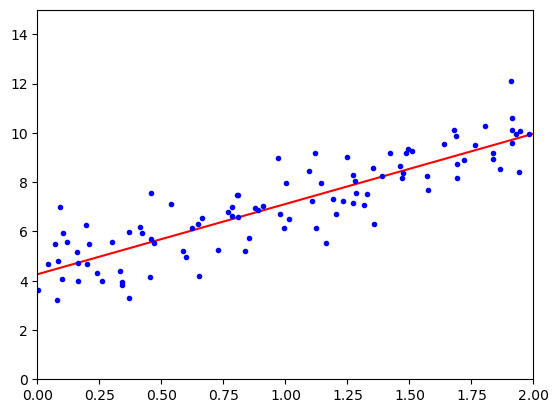

In [39]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)
print(X_new_b)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Using sklearn

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.26267339] [[2.85180921]]
[[4.26267339]
 [9.96629181]]


### Batch Gradient Descent Implementation

In [41]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.26267339],
       [2.85180921]])

### Stochastic Gradient Descent

In [42]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

"""
Alternatively, sklearn

from sklearn.linear_model import SGDRegressor
sgd_reg =SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01)
sgd_reg.fit(X, y.ravel())

epoch = 1000
epsilon = 0.001
regularization = None
learning_rate = 0.01
"""

'\nAlternatively, sklearn\n\nfrom sklearn.linear_model import SGDRegressor\nsgd_reg =SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01)\nsgd_reg.fit(X, y.ravel())\n\nepoch = 1000\nepsilon = 0.001\nregularization = None\nlearning_rate = 0.01\n'

## Polynomial Regression

In [44]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


# plt.scatter(X, y, marker="o", color="blue")
# plt.xlabel("X")
# plt.ylabel("y")
# plt.show()

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(f"X[0]: {X[0]}\nX-poly[0]: {X_poly[0]}")

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(f"lin_reg.intercept_: {lin_reg.intercept_}\nlin_reg.coef_: {lin_reg.coef_}")



X[0]: [2.48784026]
X-poly[0]: [2.48784026 6.18934915]
lin_reg.intercept_: [1.84185787]
lin_reg.coef_: [[1.04807452 0.59573152]]


## Logistic Regression (Decision Boundaries)

In [48]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris))

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if iris virginica, else 0

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


Text(0, 0.5, 'Probability')

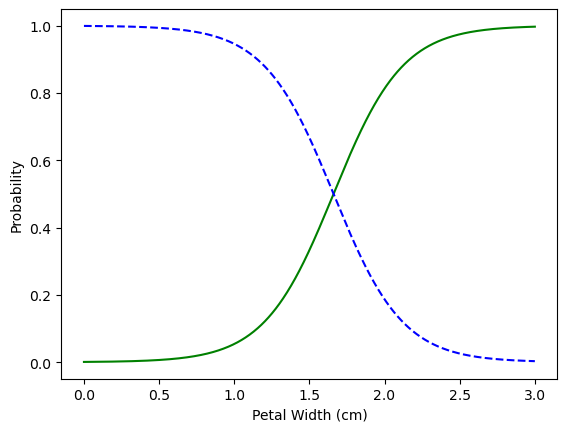

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)


X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")

### Softmax

In [60]:
X = iris["data"][:, (2, 3)] ## all instances with petal length and width only
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
